<a href="https://colab.research.google.com/github/studentbhagya/voilet-demo/blob/main/Generative_AI_(text_summarizer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


In [2]:
text_file = tf.keras.utils.get_file(
    fname = 'fra-eng.zip',
    origin = "http://storage.googleapis.com/download.tensorflow.org/data/fra-eng.zip",
    extract = True,
    )

3423204/3423204 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
import pathlib

In [4]:
extracted_dir_path = text_file  # text_file from mEOefshNz1GC is the extracted directory path
text_file = pathlib.Path(extracted_dir_path) / 'fra.txt'

In [5]:
print(text_file)

/root/.keras/datasets/fra-eng_extracted/fra.txt


In [6]:
with open(text_file) as fp:
  text_pair = [line for line in fp]

In [7]:
import random
for _ in range(5):
  print(random.choice(text_pair))

My father gave me a watch for my birthday.	Mon père m'a donné une montre pour mon anniversaire.

It's nice to be appreciated.	C'est chouette d'être estimé.

We all wondered why she had dumped such a nice man.	Nous nous demandâmes tous pourquoi elle avait balancé un homme aussi charmant.

He gave the child a toy.	Il a donné un jouet à l'enfant.

Take off your clothes.	Retirez vos vêtements !



DATA PROCESSING Basic using unicode

In [8]:
import unicodedata
import re #regular expression to clean the data

In [9]:
def normalize(line):
  line = unicodedata.normalize('NFKC', line.strip().lower())
  line = re.sub(r"^([^ \w])(?!\s)", r"\1",line)
  line = re.sub(r"(\s[^ \w])(?!\s)", r"\1",line)
  line = re.sub(r"^([^ \w])(?!\s)", r"\1",line)
  line = re.sub(r"^([^ \w])(?!\s)", r"\1",line)
  eng , fre = line.split('\t')
  fre = '[start]' + fre + '[end]'
  return eng , fre

In [10]:
with open(text_file) as fp:
  text_pair = [normalize(line) for line in fp]

In [11]:
for _ in range(5):
  print(random.choice(text_pair))

('your friends are downstairs.', '[start]vos amis sont en bas.[end]')
("we're just talking.", '[start]nous ne faisons que parler.[end]')
('i was born in kyoto.', '[start]je suis né à kyoto.[end]')
("i don't have the right equipment.", "[start]je n'ai pas le bon matériel.[end]")
('i went twice.', "[start]j'y suis allée deux fois.[end]")


In [12]:
eng_tokens , fre_tokens = set(), set()
eng_maxlen, fre_maxlen = 0, 0
for eng , fre in text_pair:
  eng_sentence_tokens = eng.split()
  fre_sentence_tokens = fre.split()
  eng_maxlen = max(eng_maxlen, len(eng_sentence_tokens))
  fre_maxlen = max(fre_maxlen, len(fre_sentence_tokens))
  eng_tokens.update(eng_sentence_tokens)
  fre_tokens.update(fre_sentence_tokens)

print(f"total token in english (eng_tokens): {eng_tokens}")
print(f"total token in french (fre_tokens): {fre_tokens}")
print(f"max length of english (eng_maxlen): {eng_maxlen}")
print(f"max length of french (fre_maxlen): {fre_maxlen}")

total token in english (eng_tokens): {'facebook?', 'disclosed', 'specialties.', 'blackberries.', 'shape,', 'offers', 'hear?', 'experience.', 'frames', 'york', 'repugnant.', 'green', 'normans', 'meals--and', 'fee?', 'imaginable', 'owner.', 'jammed', 'extraordinary', 'my,', 'center,', 'koala?', 'champagne,', 'gently', 'originated', 'toilets?', 'snow-white', 'dawn', 'education?', 'rate,', 'paperwork.', 'catchphrase.', 'eve', 'iraq.', 'wife', 'watches', 'roars,', 'headlights', 'seven', 'bookstores.', 'descended', 'produced', 'relevant?', 'searching', 'simpler.', 'task.', 'cultures;', 'muddy.', 'things?', 'labor.', 'cheerfully', 'sham.', 'fashions', 'retires,', 'greens', 'coin?', '67%', 'her.', 'teens.', 'nine?', 'clues', 'awry', 'early,', 'him!', 'bilingual.', 'refuse', 'system.', 'chatted', 'shift.', 'tag', 'tells', '10.', 'chivalry', 'respective', 'pot.', 'crisis.', 'abducted', 'rainy.', 'girl!', 'pies?', 'tourists.', 'hazelnuts', 'judgment?', 'else?', 'wardrobe.', 'luxury,', 'discourage

using pickle file to save file not in variable (saves for longer time )

In [13]:
import pickle

with open("text_pairs.pickle" , 'wb') as fp:
  pickle.dump(text_pair, fp)

In [14]:
# emedding layer
# positional encoding
# attention mode

1st TRANSFORMERS embedding layer (text to numerics)

2nd POSITIONAL encoding layer for all vector

3rd ATTENTION layer

In [15]:
from tensorflow.keras.layers import TextVectorization
import pickle
import os # Import os module to check for file existence
import pathlib # Import pathlib to construct the file path
import tensorflow as tf # Import tensorflow to use get_file
import unicodedata # Import unicodedata for normalize function
import re # Import re for normalize function

# Define the normalize function here
def normalize(line):
  line = unicodedata.normalize('NFKC', line.strip().lower())
  line = re.sub(r"^([^ \w])(?!\s)", r"\1",line)
  line = re.sub(r"(\s[^ \w])(?!\s)", r"\1",line)
  line = re.sub(r"^([^ \w])(?!\s)", r"\1",line)
  line = re.sub(r"^([^ \w])(?!\s)", r"\1",line)
  eng , fre = line.split('\t')
  fre = '[start]' + fre + '[end]'
  return eng , fre


# Check if text_pairs.pickle exists before attempting to load
if not os.path.exists("text_pairs.pickle"):
    # Re-run data loading and processing if the pickle file is missing
    print("text_pairs.pickle not found. Re-running data loading and processing.")

    # Re-run data loading and extraction
    text_file_zip = tf.keras.utils.get_file(
        fname = 'fra-eng.zip',
        origin = "http://storage.googleapis.com/download.tensorflow.org/data/fra-eng.zip",
        extract = True,
    )
    extracted_dir_path = text_file_zip
    text_file = pathlib.Path(extracted_dir_path) / 'fra.txt'

    # Use the normalize function
    with open(text_file) as fp:
        text_pair = [normalize(line) for line in fp]
    with open("text_pairs.pickle" , 'wb') as fp:
        pickle.dump(text_pair, fp)
else:
    with open("text_pairs.pickle", 'rb') as fp:
        text_pair = pickle.load(fp)

In [16]:
import random # Import random module
random.shuffle(text_pair)

In [17]:
n_val = int(.15*len(text_pair))
n_train = len(text_pair) - 2*n_val
train_pair = text_pair[:n_train]
test_pair = text_pair[n_train+n_val:]

In [18]:
vocab_en = 10000
vocab_fr = 20000
seq_length =25

In [19]:
eng_vect = TextVectorization(
    max_tokens = vocab_en,
    standardize = None,
    split = 'whitespace',
    output_mode = 'int',
    output_sequence_length = seq_length
)

In [20]:
fre_vect = TextVectorization(
    max_tokens = vocab_fr,
    standardize = None,
    split = 'whitespace',
    output_mode = 'int',
    output_sequence_length = seq_length
)

In [21]:
train_eng = [pair[0] for pair in train_pair]
train_fre = [pair[1] for pair in train_pair]

In [22]:
eng_vect.adapt(train_eng)
fre_vect.adapt(train_fre)

In [23]:
with open('vectorize.pickle', 'wb') as fp:
  data = {'train': train_pair,
          'test': test_pair,
          'eng_vect': eng_vect.get_config(),
          'fre_vect': fre_vect.get_config(),
          'eng_weights' : eng_vect.get_weights(),
          'fre_weights' : fre_vect.get_weights()
  }
  pickle.dump(data, fp)

In [24]:
import os # Import os module to check for file existence

# Check if vectorize.pickle exists before attempting to load
if not os.path.exists("vectorize.pickle"):
    print("vectorize.pickle not found. Please ensure the previous steps to create it were successful.")
else:
    with open("vectorize.pickle", 'rb') as fp:
        data = pickle.load(fp)

In [25]:
train_pair = data['train']
test_pair = data['test']

eng_vect = TextVectorization.from_config(data['eng_vect'])
eng_vect.set_weights(data['eng_weights'])
fre_vect = TextVectorization.from_config(data['fre_vect'])
fre_vect.set_weights(data['fre_weights'])

# Re-adapt the layers to initialize the lookup tables
train_eng = [pair[0] for pair in train_pair]
train_fre = [pair[1] for pair in train_pair]
eng_vect.adapt(train_eng)
fre_vect.adapt(train_fre)

In [26]:
import tensorflow as tf

def format_dataset(eng, fre):

  eng = eng_vect(eng)
  fre = fre_vect(fre)
  # Ensure decoder input has sequence length 25 by padding
  dec_input = fre[:,:-1]
  paddings = [[0, 0], [0, tf.maximum(0, 25 - tf.shape(dec_input)[1])]]
  dec_input = tf.pad(dec_input, paddings, "CONSTANT")

  source = {'enc_input': eng,
            'dec_input': dec_input
  }
  target = fre[:,1:]

  return (source, target)

def make_dataset(pair, batchsize = 64):

  eng_text, fre_text = zip(*pair)
  dataset = tf.data.Dataset.from_tensor_slices((list(eng_text), list(fre_text)))
  # Ensure the dataset is padded to the correct sequence length
  return dataset.shuffle(2048).batch(batchsize).map(format_dataset).prefetch(16).cache()

In [27]:
train_ds = make_dataset(train_pair)
test_ds = make_dataset(test_pair)

In [28]:
for inputs, target in train_ds.take(1):
  # Corrected key names to match the format_dataset function
  print(inputs['enc_input'].shape)
  print(inputs['enc_input'][0])
  print(inputs['dec_input'].shape)
  print(inputs['dec_input'][0])
  print(target.shape)
  print(target[0])

(64, 25)
tf.Tensor(
[  19   16 7002  250    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0], shape=(25,), dtype=int64)
(64, 25)
tf.Tensor(
[ 11  55 142  36   1 317   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0], shape=(25,), dtype=int64)
(64, 24)
tf.Tensor(
[ 55 142  36   1 317   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0], shape=(24,), dtype=int64)


In [29]:
# 3rd
import numpy as np
import tensorflow as tf

def pos_enc_matrix(L , d, n = 10000):
  assert d%2 ==0
  d2 = d//2

  p = np.zeros((L, d))
  k = np.arange(L).reshape(-1, 1)
  i = np.arange(d2).reshape(1, -1)
  denom = np.power(n, -i/d2)
  args = k *denom

  p[:, ::2] = np.sin(args)
  p[:, 1::2] = np.cos(args)

  return p

In [30]:
class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, seq_length, vocab_size, embed_dim, **kwargs):

    super().__init__(**kwargs)
    self.seq_length = seq_length
    self.vocab_size = vocab_size
    self.embed_dim = embed_dim
    self.token_embeddings = tf.keras.layers.Embedding(
        input_dim = vocab_size, output_dim = embed_dim, mask_zero = True)
    matrix = pos_enc_matrix(seq_length, embed_dim)
    self.position_embeddings = tf.constant(matrix, dtype = tf.float32)

  def call(self, inputs):
    embedded_tokens = self.token_embeddings(inputs)
    return embedded_tokens + self.position_embeddings

  def compute_mask(self, *args, **kwargs):
    return self.token_embeddings.compute_mask(*args, **kwargs)

  def get_config(self):
    config = super().get_config()
    config.update({
        'seq_length': self.seq_length,
        'vocab_size': self.vocab_size,
        'embed_dim': self.embed_dim
    })

In [31]:
vocab_en = 10000
vacab_fr = 20000
seq_length = 25

In [32]:
for inputs, targets in train_ds.take(1):
  print(inputs['enc_input'])
  embed_en = PositionalEmbedding(seq_length, vocab_en, embed_dim = 512)

  en_emb = embed_en(inputs['enc_input'])
  print(en_emb._keras_mask)


tf.Tensor(
[[   3  118   28 ...    0    0    0]
 [   5 5090   16 ...    0    0    0]
 [  11    3  433 ...    0    0    0]
 ...
 [  13 1300  321 ...    0    0    0]
 [   2   31   22 ...    0    0    0]
 [  25   55 1257 ...    0    0    0]], shape=(64, 25), dtype=int64)
tf.Tensor(
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]], shape=(64, 25), dtype=bool)


NN creating Transformer

self-attention model

In [33]:
def self_attention(input_shape, prifix = 'att', mask = False, **kwargs):

  inputs = tf.keras.layers.Input(shape = input_shape, dtype = 'float32', name = f"{prifix}_init")

  # Remove 'prefix' from kwargs before passing to MultiHeadAttention
  att_kwargs = kwargs.copy()
  att_kwargs.pop('prefix', None)

  attention = tf.keras.layers.MultiHeadAttention(name = f"{prifix}_atti", **att_kwargs)
  norm = tf.keras.layers.LayerNormalization(name = f"{prifix}_norm1")
  add = tf.keras.layers.Add(name = f"{prifix}_add1")
  attout = attention(query = inputs, value = inputs, key = inputs, use_causal_mask = mask)
  output = norm(add([inputs, attout]))
  model = tf.keras.Model(inputs = inputs, outputs = output, name = f"{prifix}_att")
  return model

In [34]:
seq_length = 25
key_dim = 120
num_heads = 8

model = self_attention(input_shape = (seq_length, key_dim), num_heads = num_heads, key_dim = key_dim)

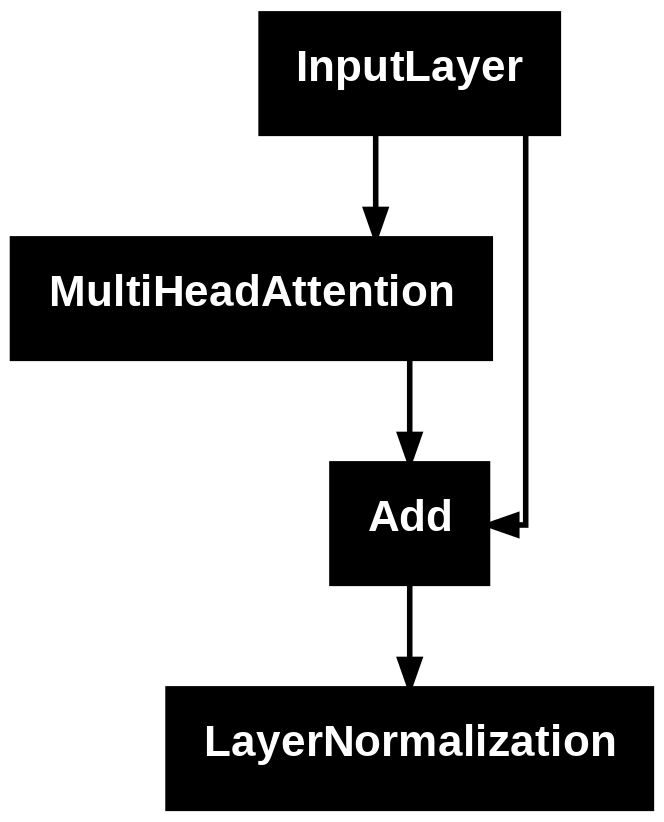

In [35]:
tf.keras.utils.plot_model(model)

In [36]:
def cross_attention(input_shape, contest_shape, prifix = 'att', **kwargs):

  inputs = tf.keras.layers.Input(shape = input_shape, dtype = 'float32', name = f"{prifix}_in2")
  context = tf.keras.layers.Input(shape = contest_shape, dtype = 'float32', name = f"{prifix}_ctx2")

  # Remove 'prefix' from kwargs before passing to MultiHeadAttention
  att_kwargs = kwargs.copy()
  att_kwargs.pop('prefix', None)

  attention = tf.keras.layers.MultiHeadAttention(name = f"{prifix}_atti", **att_kwargs)
  norm = tf.keras.layers.LayerNormalization(name = f"{prifix}_norm2")
  add = tf.keras.layers.Add(name = f"{prifix}_add2")

  attout = attention(query = inputs, value = context, key = context)
  output = norm(add([inputs, attout]))
  model = tf.keras.Model(inputs = [inputs, context], outputs = output, name = f"{prifix}_crs_at")

  return model

In [37]:
model = cross_attention(input_shape = (seq_length, key_dim), contest_shape = (seq_length, key_dim), num_heads = num_heads, key_dim = key_dim)


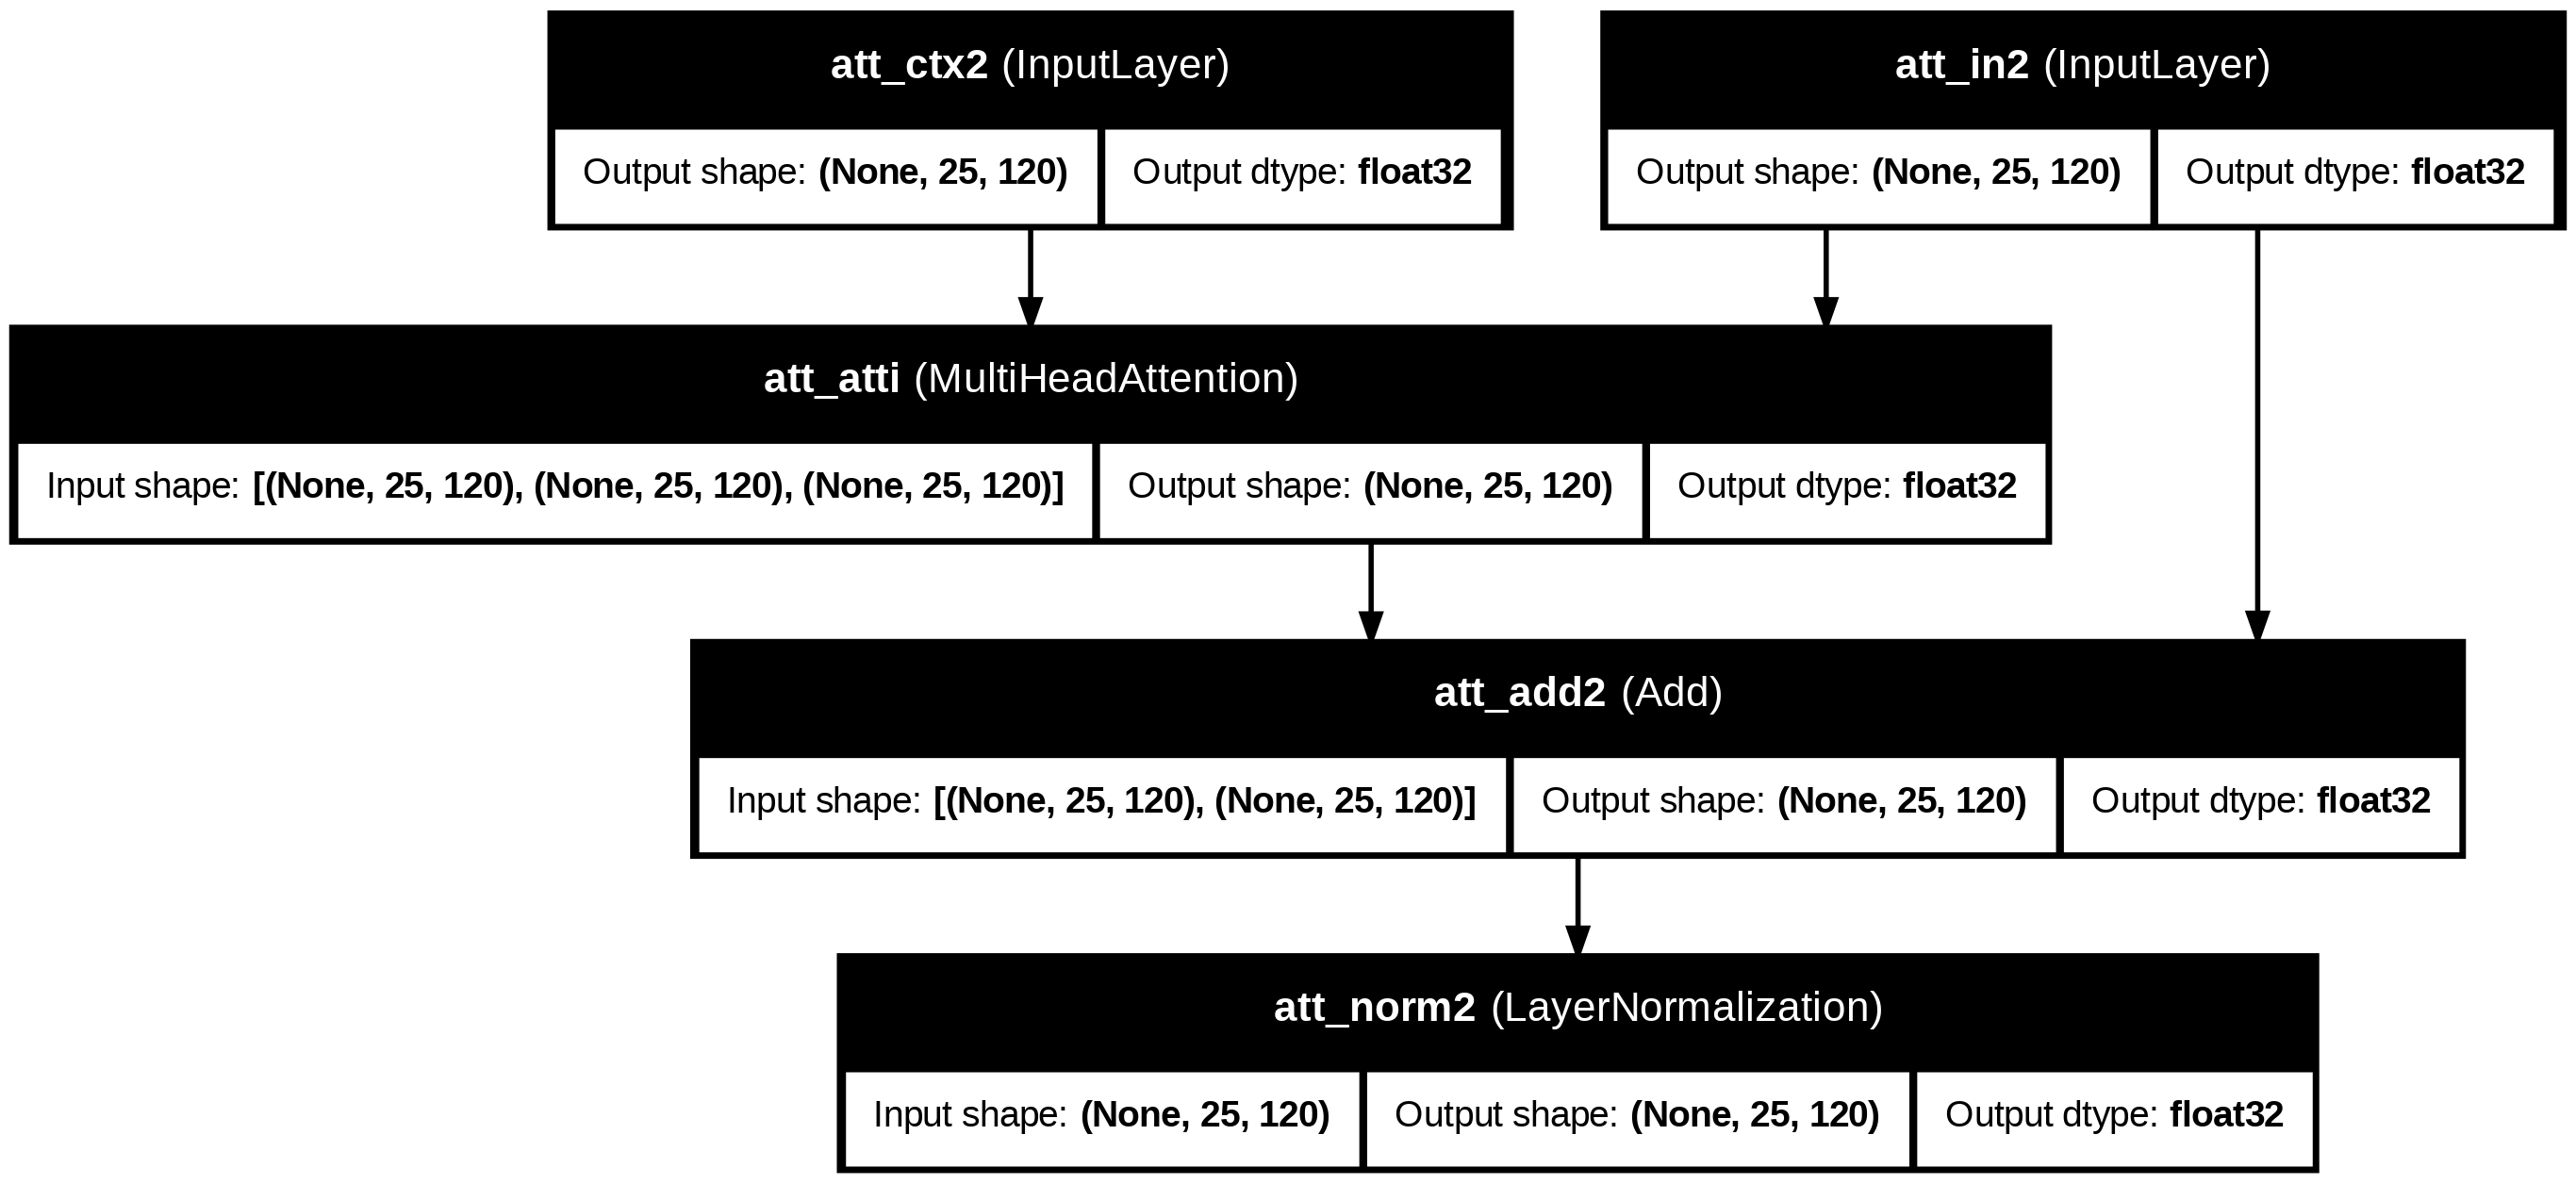

In [38]:
tf.keras.utils.plot_model(model, show_shapes= True, show_dtype = True, show_layer_names = True, show_layer_activations=True)

FEED FORWARD NN (Regular network)

In [39]:
def feed_forward(input_shape,model_dim, ff_dim, dropout = .1, prefix = 'ff'):
  inputs = tf.keras.layers.Input(shape = input_shape, dtype = 'float32', name = f"{prefix}_in3")
  dense1 = tf.keras.layers.Dense(ff_dim, name = f'{prefix}_ff1', activation = 'relu')
  dense2 = tf.keras.layers.Dense(model_dim, name = f'{prefix}_ff2')
  drop = tf.keras.layers.Dropout(dropout, name = f'{prefix}_drop')
  add = tf.keras.layers.Add(name = f'{prefix}_add3')

  ffout = drop(dense2(dense1(inputs)))

  norm = tf.keras.layers.LayerNormalization(name = f'{prefix}_norm3')
  output = add([inputs, ffout])
  model = tf.keras.Model(inputs = inputs, outputs = output, name = f"{prefix}_ff")
  return model

In [40]:
ff_dim = 512

model = feed_forward(input_shape = (seq_length, key_dim), model_dim = key_dim, ff_dim = ff_dim)

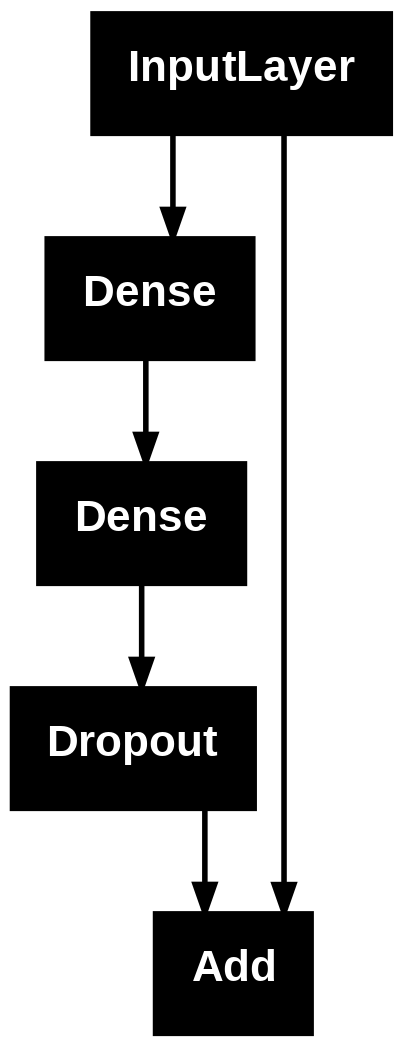

In [41]:
tf.keras.utils.plot_model(model)

In [42]:
import tensorflow as tf

def encoder(input_shape, key_dim, ff_dim, dropout = .1, prefix = 'enc', **kwargs):
  inputs = tf.keras.layers.Input(shape = input_shape, dtype = 'float32', name = f"{prefix}_in0")
  # Remove 'prefix' from kwargs before passing to self_attention
  att_kwargs = kwargs.copy()
  att_kwargs.pop('prefix', None)
  attention_output = self_attention(input_shape, prifix = f"{prefix}_self_att", key_dim = key_dim,mask = False, **att_kwargs)(inputs)
  output = feed_forward(input_shape, key_dim, ff_dim, dropout, prefix = f"{prefix}_ff")(attention_output)
  model = tf.keras.Model(inputs = inputs, outputs = output, name = prefix)
  return model

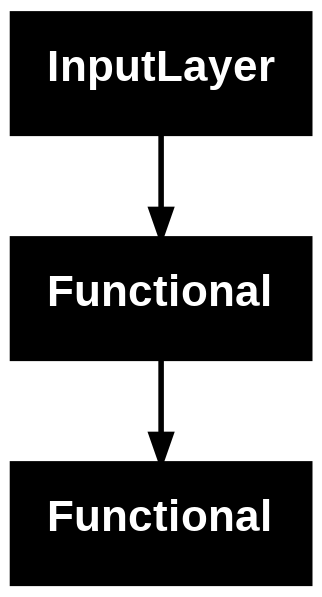

In [43]:
seq_length = 25
key_dim = 128
ff_dim = 512
num_heads = 8

model = encoder(input_shape = (seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, num_heads = num_heads)
tf.keras.utils.plot_model(model)


DECODER METHOD

In [44]:
import tensorflow as tf

def decoder(input_shape, key_dim, ff_dim, dropout = .1, prefix = 'dec', **kwargs):
  import tensorflow as tf
  inputs = tf.keras.layers.Input(shape = input_shape, dtype = tf.float32, name = f"{prefix}_in0")
  context = tf.keras.layers.Input(shape = input_shape, dtype = tf.float32, name = f"{prefix}_ctx0")
  # Remove 'prefix' from kwargs before passing to self_attention and cross_attention
  att_kwargs = kwargs.copy()
  att_kwargs.pop('prefix', None)
  attmodel = self_attention(input_shape, key_dim=key_dim, mask = True, prefix = f"{prefix}_self_att", **att_kwargs) # Pass prefix to self_attention
  crossmodel = cross_attention(input_shape, input_shape, key_dim = key_dim, prefix = f"{prefix}_cross_att", num_heads = att_kwargs['num_heads']) # Pass prefix to cross_attention
  ff_model = feed_forward(input_shape, key_dim, ff_dim, dropout, prefix = f"{prefix}_ff")

  x = attmodel(inputs)
  x = crossmodel([x, context])
  output = ff_model(x)
  model = tf.keras.Model(inputs = [inputs, context], outputs = output, name = prefix)
  return model


"""seq_length = 25
key_dim = 128
ff_dim = 512
num_heads = 8

model = decoder(input_shape = (seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, num_heads = num_heads)
tf.keras.utils.plot_model(model)"""

'seq_length = 25\nkey_dim = 128\nff_dim = 512\nnum_heads = 8\n\nmodel = decoder(input_shape = (seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, num_heads = num_heads)\ntf.keras.utils.plot_model(model)'

TRANSFORMER MODEL


In [45]:
def transformer(num_layers, num_heads, seq_length, key_dim, ff_dim, vocab_size_en, vocab_size_fr, dropout = .1, name = 'transformer'):

  input_enc = tf.keras.layers.Input(shape =(seq_length,), dtype = 'float32', name = 'enc_input')
  input_dec = tf.keras.layers.Input(shape = (seq_length,), dtype = 'float32', name = 'dec_input')

  emb_enc = PositionalEmbedding(seq_length, vocab_size_en, key_dim, name = 'embed_enc')
  emb_dec = PositionalEmbedding(seq_length, vocab_size_fr, key_dim, name = 'embed_dec')

  encoders = [encoder(input_shape = (seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, dropout = dropout, prefix = f"enc{i}", num_heads = num_heads)
             for i in range(num_layers)]
  decoders = [decoder(input_shape = (seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, dropout = dropout, prefix = f"dec{i}", num_heads = num_heads) # Corrected prefix to "dec"
             for i in range(num_layers)]

  final = tf.keras.layers.Dense(vocab_size_fr, name = 'linear')

  x1 = emb_enc(input_enc)
  x2 = emb_dec(input_dec)
  for layer in encoders:
    x1 = layer(x1)
  for layer in decoders:
    x2 = layer([x2, x1])

  output = final(x2)

  try:
    del output._keras_mask
  except:
    pass

  model = tf.keras.Model(inputs = [input_enc, input_dec], outputs = output, name = name)

  return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'enc0' (of type Functional) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'dec0' (of type Functional) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


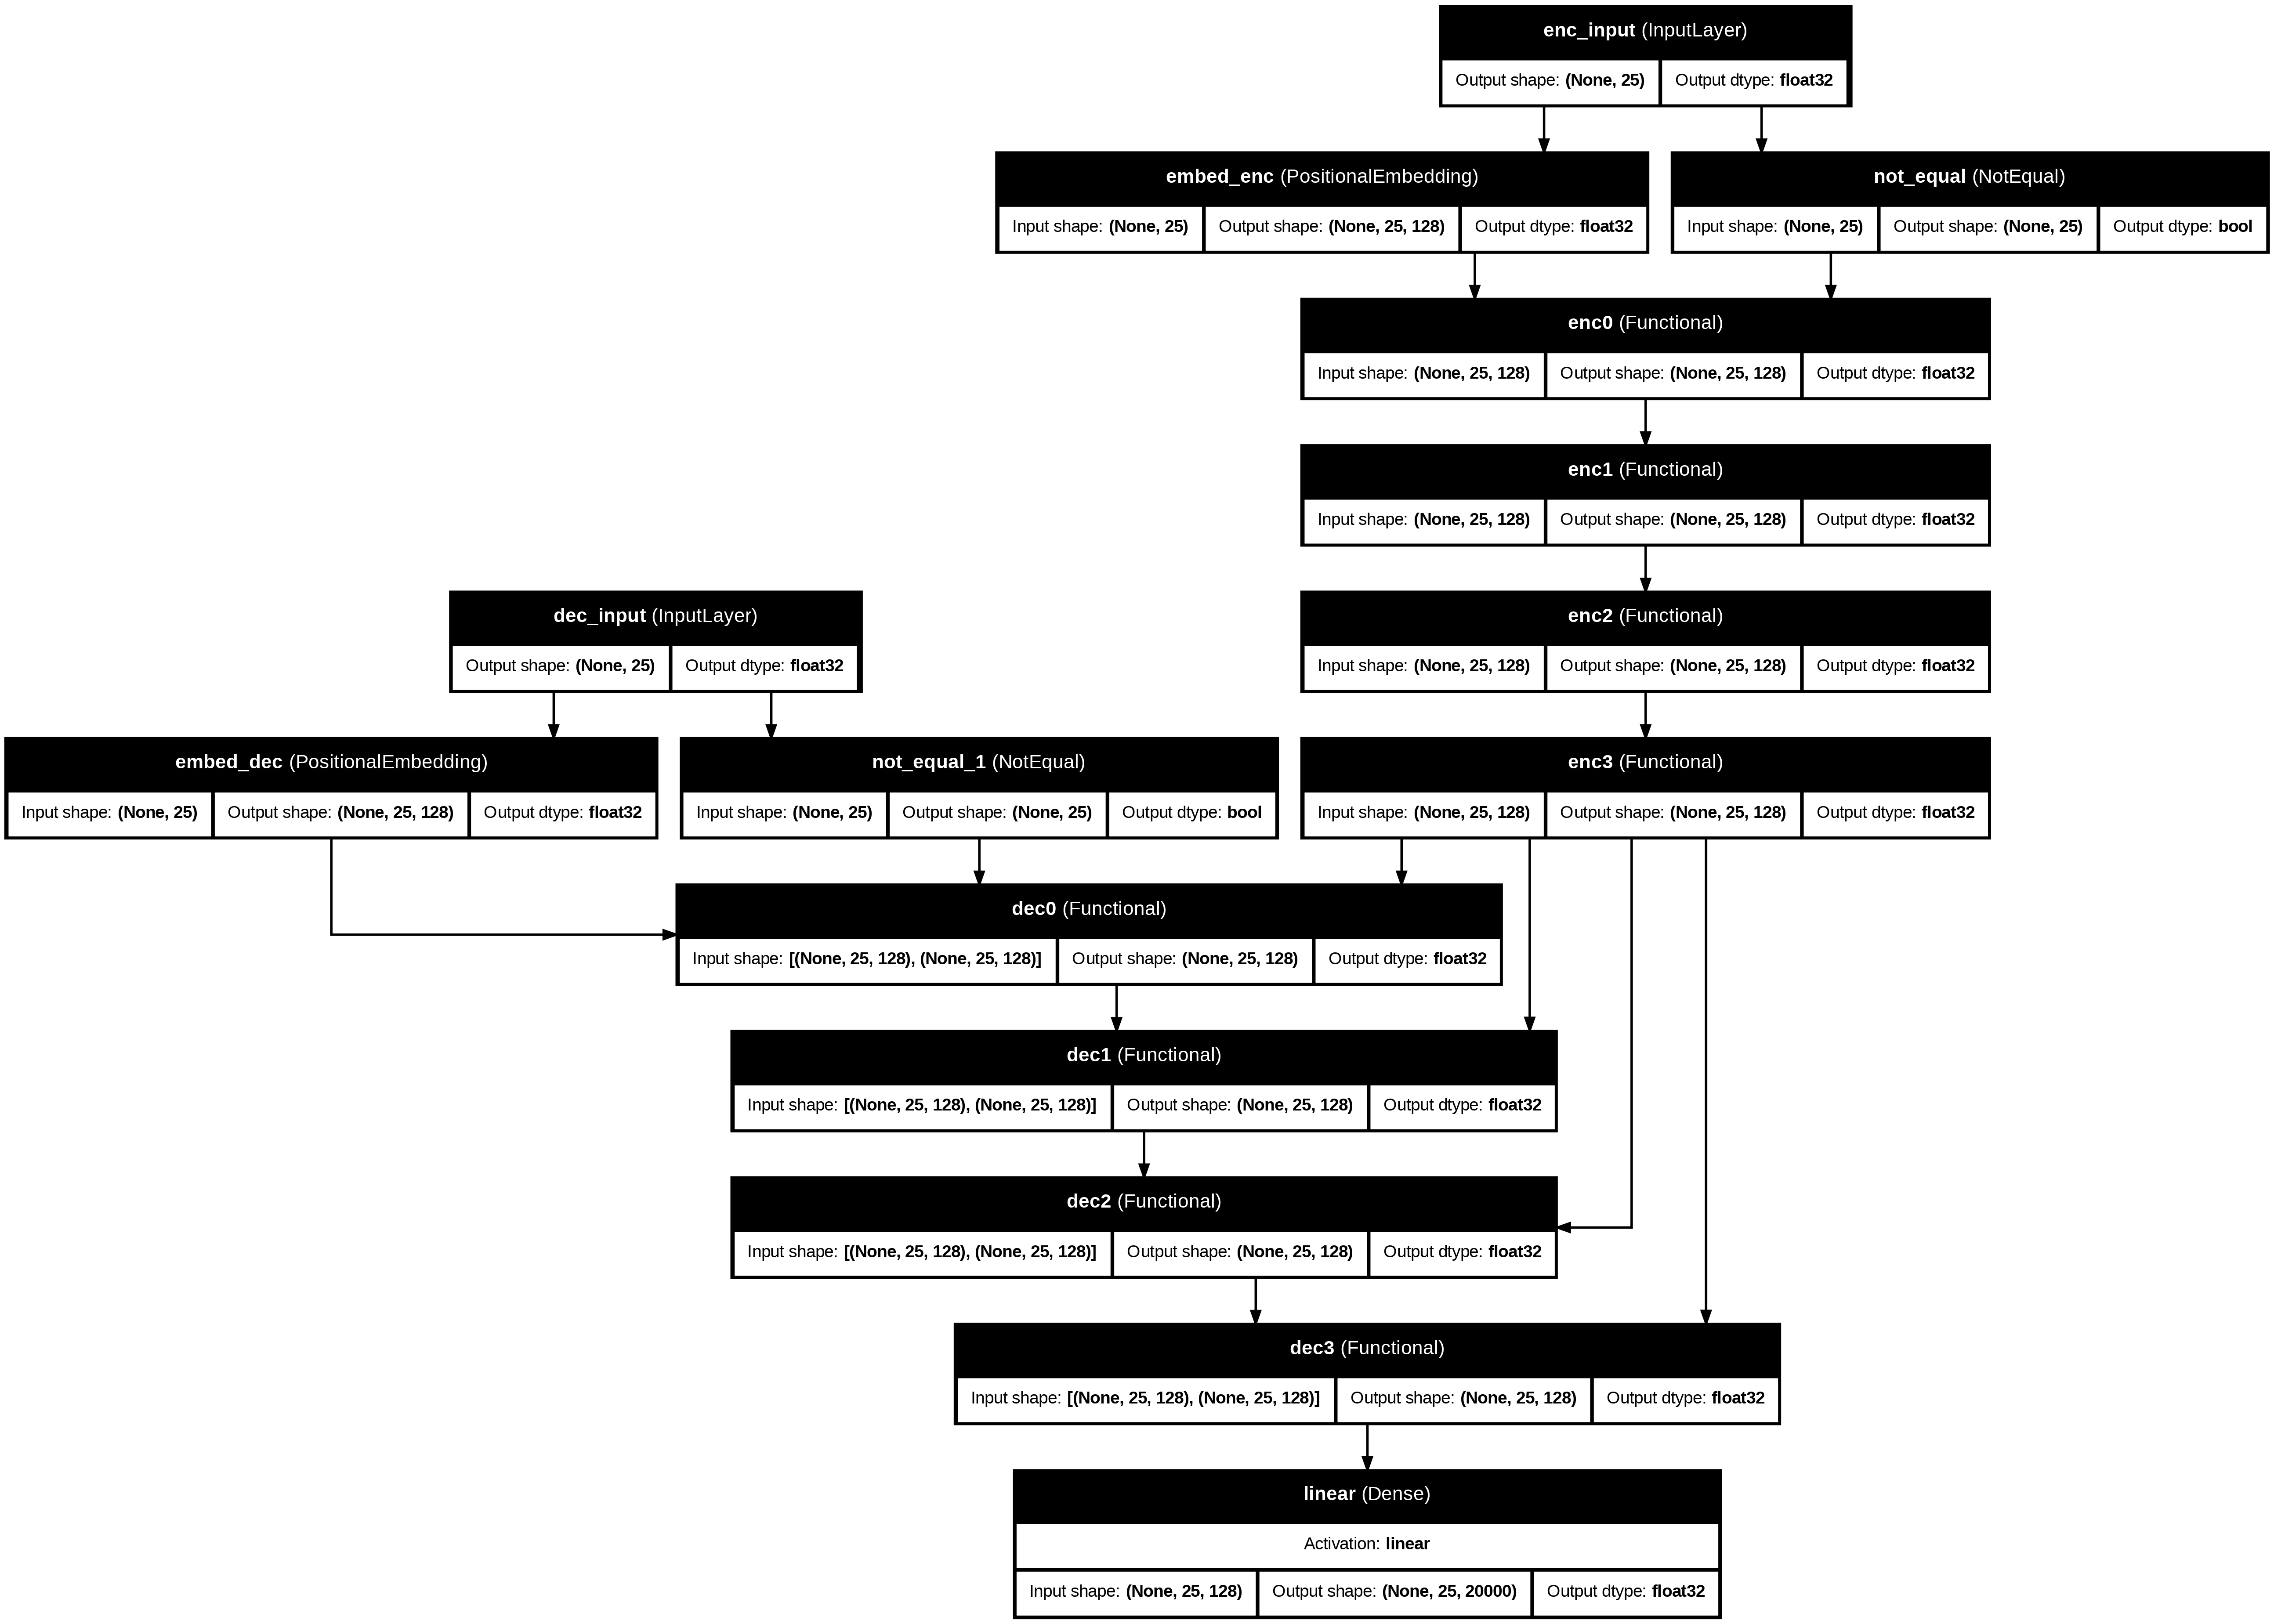

In [46]:
seq_length = 25
num_layers = 4
num_heads = 8
key_dim = 128
ff_dim = 512
dropout = .1
vocab_size_en= 10000
vocab_size_fr = 20000

model = transformer(num_layers=num_layers, num_heads=num_heads, seq_length=seq_length, key_dim=key_dim, ff_dim=ff_dim, vocab_size_en=vocab_size_en, vocab_size_fr=vocab_size_fr, dropout=dropout)

tf.keras.utils.plot_model(model, show_shapes = True, show_dtype= True, show_layer_names = True, show_layer_activations= True)

In [47]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ enc_input           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed_enc           │ (None, 25, 128)   │  1,280,000 │ enc_input[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 25)        │          0 │ enc_input[0][0]   │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc0 (Functional)   │ (None, 25, 128)   │    659,456 │ embed_enc[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1 (Functional)   │ (None, 25, 128)   │    659,456 │ enc0[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_input           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2 (Functional)   │ (None, 25, 128)   │    659,456 │ enc1[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed_dec           │ (None, 25, 128)   │  2,560,000 │ dec_input[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc3 (Functional)   │ (None, 25, 128)   │    659,456 │ enc2[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 25)        │          0 │ dec_input[0][0]   │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec0 (Functional)   │ (None, 25, 128)   │  1,187,200 │ embed_dec[0][0],  │
│                     │                   │            │ enc3[0][0],       │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec1 (Functional)   │ (None, 25, 128)   │  1,187,200 │ dec0[0][0],       │
│                     │                   │            │ enc3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec2 (Functional)   │ (None, 25, 128)   │  1,187,200 │ dec1[0][0],       │
│                     │                   │            │ enc3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec3 (Functional)   │ (None, 25, 128)   │  1,187,200 │ dec2[0][0],       │
│                     │                   │            │ enc3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linear (Dense)      │ (None, 25, 20000) │  2,580,000 │ dec3[0][0]        │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,806,624 (52.67 MB)

 Trainable params: 13,806,624 (52.67 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
history = model.fit(train_ds, epochs = 20, validation_data = test_ds)

Epoch 1/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 168s 92ms/step - loss: 1.9410 - mask_accuracy: 0.6674 - val_loss: 2.1937 - val_mask_accuracy: 0.6263
Epoch 2/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 166s 91ms/step - loss: 1.9425 - mask_accuracy: 0.6702 - val_loss: 2.1765 - val_mask_accuracy: 0.6282
Epoch 3/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 165s 90ms/step - loss: 1.8952 - mask_accuracy: 0.6788 - val_loss: 2.1274 - val_mask_accuracy: 0.6373
Epoch 4/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 167s 91ms/step - loss: 1.8471 - mask_accuracy: 0.6877 - val_loss: 2.0962 - val_mask_accuracy: 0.6446
Epoch 5/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 204s 93ms/step - loss: 1.8050 - mask_accuracy: 0.6959 - val_loss: 2.1067 - val_mask_accuracy: 0.6446
Epoch 6/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 165s 90ms/step - loss: 1.7620 - mask_accuracy: 0.7035 - val_loss: 2.0812 - val_mask_accuracy: 0.6523
Epoch 7/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 165s 90ms/step - loss: 1.7218 - mask_accuracy: 0.7108 - val_loss: 2.0729 - val_mask_accuracy: 0.6524

In [68]:
class customSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, key_dim, warmup_steps = 40000):
    super().__init__()
    self.key_dim = key_dim
    self.warmup_steps = warmup_steps

    self.d = tf.cast(self.key_dim, tf.float32)

  def __call__(self, step):
      step = tf.cast(step, tf.float32)
      arg1 = tf.math.rsqrt(step)
      arg2 = step*(self.warmup_steps ** -1.5)
      return tf.math.rsqrt(self.d) * tf.math.minimum(arg1, arg2)

  def get_config(self):
      config = {
          "key_dim" : self.key_dim,
          "warmup_steps" : self.warmup_steps
      }
      return config

key_dim = 128
lr = customSchedule(key_dim)
optimizer = tf.keras.optimizers.Adam(lr, beta_1 = .9, beta_2 = .98, epsilon = 1e-9)

In [69]:
def masked_loss(label, pred):
  # Slice the prediction tensor to match the shape of the label tensor
  pred = pred[:, :-1]
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = 'none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype = loss.dtype)
  loss *= mask
  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss

def mask_accuracy(label, pred):
  # Slice the prediction tensor to match the shape of the label tensor
  pred = pred[:, :-1]
  pred = tf.argmax(pred, axis = 2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype = tf.float32)
  mask = tf.cast(mask, dtype = tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [70]:
model.compile(loss = masked_loss, optimizer = optimizer, metrics = [mask_accuracy])
model.summary()

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ enc_input           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed_enc           │ (None, 25, 128)   │  1,280,000 │ enc_input[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 25)        │          0 │ enc_input[0][0]   │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc0 (Functional)   │ (None, 25, 128)   │    659,456 │ embed_enc[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc1 (Functional)   │ (None, 25, 128)   │    659,456 │ enc0[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_input           │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc2 (Functional)   │ (None, 25, 128)   │    659,456 │ enc1[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embed_dec           │ (None, 25, 128)   │  2,560,000 │ dec_input[0][0]   │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ enc3 (Functional)   │ (None, 25, 128)   │    659,456 │ enc2[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 25)        │          0 │ dec_input[0][0]   │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec0 (Functional)   │ (None, 25, 128)   │  1,187,200 │ embed_dec[0][0],  │
│                     │                   │            │ enc3[0][0],       │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec1 (Functional)   │ (None, 25, 128)   │  1,187,200 │ dec0[0][0],       │
│                     │                   │            │ enc3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec2 (Functional)   │ (None, 25, 128)   │  1,187,200 │ dec1[0][0],       │
│                     │                   │            │ enc3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec3 (Functional)   │ (None, 25, 128)   │  1,187,200 │ dec2[0][0],       │
│                     │                   │            │ enc3[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ linear (Dense)      │ (None, 25, 20000) │  2,580,000 │ dec3[0][0]        │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,806,624 (52.67 MB)

 Trainable params: 13,806,624 (52.67 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history = model.fit(train_ds, epochs = 20, validation_data = test_ds)

Epoch 1/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 234s 94ms/step - loss: 9.2458 - mask_accuracy: 0.0221 - val_loss: 6.6682 - val_mask_accuracy: 0.0589
Epoch 2/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 179s 90ms/step - loss: 6.7095 - mask_accuracy: 0.0686 - val_loss: 5.9312 - val_mask_accuracy: 0.1309
Epoch 3/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 164s 90ms/step - loss: 5.8977 - mask_accuracy: 0.1406 - val_loss: 5.2334 - val_mask_accuracy: 0.1863
Epoch 4/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 165s 90ms/step - loss: 5.2471 - mask_accuracy: 0.1957 - val_loss: 4.6998 - val_mask_accuracy: 0.2517
Epoch 5/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 167s 91ms/step - loss: 4.6823 - mask_accuracy: 0.2646 - val_loss: 4.0823 - val_mask_accuracy: 0.3398
Epoch 6/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 167s 92ms/step - loss: 4.1238 - mask_accuracy: 0.3438 - val_loss: 3.6204 - val_mask_accuracy: 0.4091
Epoch 7/20
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 167s 91ms/step - loss: 3.6542 - mask_accuracy: 0.4130 - val_loss: 3.2681 - val_mask_accuracy: 0.4688

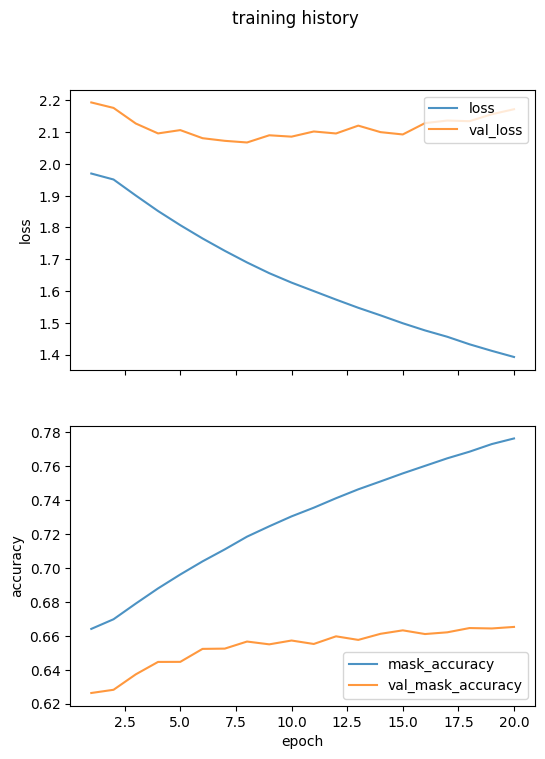

In [71]:
import matplotlib.pyplot as plt

fig , axes = plt.subplots(2, figsize = (6, 8), sharex = True)
fig.suptitle(
    "training history"
)
x = list(range(1,21))
axes[0].plot(x, history.history['loss'], alpha = 0.8, label = 'loss')
axes[0].plot(x, history.history['val_loss'], alpha = 0.8, label = 'val_loss')
axes[0].set_ylabel('loss')
axes[0].legend(loc = 'upper right')
axes[1].plot(x, history.history['mask_accuracy'], alpha = 0.8, label = 'mask_accuracy')
axes[1].plot(x, history.history['val_mask_accuracy'], alpha = 0.8, label = 'val_mask_accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(loc = 'lower right')
plt.show()

In [72]:
def translate(sentence):

  enr_tokens = eng_vect([sentence])
  lookup = list(fre_vect.get_vocabulary())
  start_sent, end_sent = "[start]" , '[end]'
  output_sent = [start_sent]
  for i in range(seq_length):
    vector = fre_vect([''.join(output_sent)])
    assert vector.shape == (1, seq_length)
    dec_tokens = vector # Removed slicing here
    assert dec_tokens.shape == (1, seq_length)
    pred = model([enr_tokens, dec_tokens])
    assert pred.shape == (1, seq_length, vocab_size_fr)
    word = lookup[np.argmax(pred[0, i, :])]
    output_sent.append(word)
    if word == end_sent:
      break
  return output_sent

In [73]:
seq_length = 25
vocab_size_en = 10000
vocab_size_fre = 20000
test_count = 20

for n in range(test_count):
  eng_sent , fre_sent = random.choice(test_pair)
  trans = translate(eng_sent)

  print(f"Test case : {n}")
  print(f"English : {eng_sent}")
  print(f"French : {fre_sent}")
  print(f"Translated : {' '.join(trans)}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'enc0_self_att_att' (of type Functional) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'enc0' (of type Functional) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'att_att' (of type Functional) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist

Test case : 0
English : i know what they mean.
French : [start]je sais ce qu'ils veulent dire.[end]
Translated : [start] ce n'a ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] à à à à à à à à à à
Test case : 1
English : my friend gave me a silk scarf.
French : [start]mon amie m'a donné un foulard de soie.[end]
Translated : [start] à une une une à à à à à à à à à à à à à à à à à à à à à
Test case : 2
English : my mother has a red apron.
French : [start]ma mère porte un tablier rouge.[end]
Translated : [start] a à au au au au au au au au au au au au au au au au au au à à au au au
Test case : 3
English : your opinion doesn't matter.
French : [start]ton opinion est sans importance.[end]
Translated : [start] n'a pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end] pas.[end]
